<a href="https://colab.research.google.com/github/sahay-46/shruti_ranjan/blob/main/2348517_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# Load and run the dataset
data = pd.read_csv('/content/Market_Basket_Optimisation (1).csv')
data.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# check for null values
data.isnull().sum()

shrimp                  0
almonds              1754
avocado              3112
vegetables mix       4156
green grapes         4972
whole weat flour     5637
yams                 6132
cottage cheese       6520
energy drink         6847
tomato juice         7106
low fat yogurt       7245
green tea            7347
honey                7414
salad                7454
mineral water        7476
salmon               7493
antioxydant juice    7497
frozen smoothie      7497
spinach              7498
olive oil            7500
dtype: int64

In [ ]:
# Fill null values with "NA")
data_filled = data.fillna("NA")
print(data_filled.isnull().sum())

shrimp               0
almonds              0
avocado              0
vegetables mix       0
green grapes         0
whole weat flour     0
yams                 0
cottage cheese       0
energy drink         0
tomato juice         0
low fat yogurt       0
green tea            0
honey                0
salad                0
mineral water        0
salmon               0
antioxydant juice    0
frozen smoothie      0
spinach              0
olive oil            0
dtype: int64


In [ ]:
#  convert the data into a binary matrix format
binary_matrix = data.notna().astype(int)
binary_matrix.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


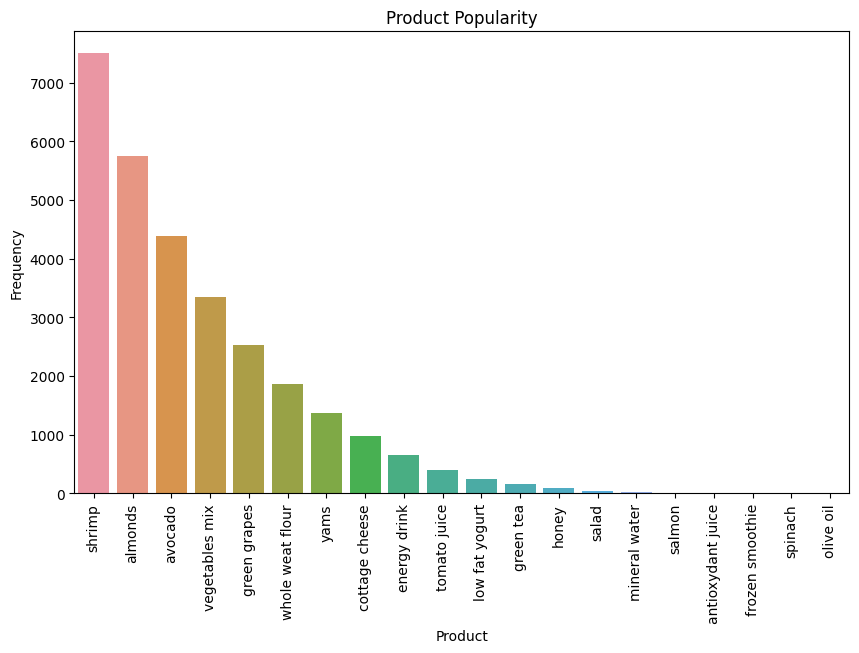

In [ ]:
# Visualize Product Popularity using a bar chart
product_popularity = binary_matrix.sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=product_popularity.index, y=product_popularity.values)
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.title('Product Popularity')
plt.show()


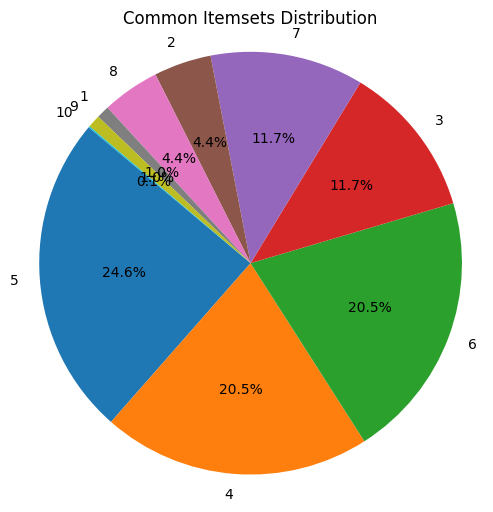

In [ ]:
# Frequent Itemsets Mining using Apriori Algorithm
frequent_itemsets = apriori(binary_matrix, min_support=0.05, use_colnames=True)

# Count the number of itemsets with different lengths
itemset_lengths = frequent_itemsets['itemsets'].apply(len).value_counts()

# Plot a pie chart for the distribution of itemset lengths
plt.figure(figsize=(6, 6))
plt.pie(itemset_lengths, labels=itemset_lengths.index, autopct='%1.1f%%', startangle=140)
plt.title('Common Itemsets Distribution')
plt.axis('equal')
plt.show()

In [ ]:
# Generate Association Rules
association_rules_df = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.2)
# Print the first few rows of the association rules DataFrame
print(association_rules_df.head())

# Create a pivot table for support and confidence values
pivot_table = association_rules_df.pivot(index='antecedents', columns='consequents', values=['support', 'confidence'])
# Print the pivot table for inspection
print(pivot_table)

In [ ]:
# Create a heatmap for confidence values
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table['confidence'], annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Association Rule Confidence Heatmap')
plt.show()

In [ ]:
# Create a heatmap for support values
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table['support'], annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Association Rule Support Heatmap')
plt.show()

In [ ]:
import numpy as np

# Store Layout Optimization Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(binary_matrix.T, cmap="coolwarm", cbar=False)
plt.title('Store Layout Optimization')
plt.xlabel('Transactions')
plt.ylabel('Products')
plt.show()

# Cross-Selling Strategy Matrix (Example using random data)
cross_selling_matrix = np.random.randint(2, size=(len(unique_products), len(unique_products)))
plt.figure(figsize=(10, 8))
sns.heatmap(cross_selling_matrix, cmap="Blues", cbar=True)
plt.title('Cross-Selling Strategy Matrix')
plt.xlabel('Products')
plt.ylabel('Products')
plt.show()

In [ ]:
# Define a function for personalized recommendations
def get_personalized_recommendations(basket):
    recommendations = set()
    for itemset in frequent_itemsets['itemsets']:
        if itemset.issubset(basket):
            recommendations.update(itemset)
    recommendations -= basket
    return recommendations

# Example usage of the personalized recommendations function
customer_basket = {'shrimp', 'green grapes', 'avocado'}
recommended_products = get_personalized_recommendations(customer_basket)
print("Recommended Products:", recommended_products)


Recommended Products: set()


In [ ]:
# Calculate the average lift before and after cross-selling strategy
average_lift_before = association_rules_df['lift'].mean()

# Simulate the effect of cross-selling strategy
# For simplicity, let's consider a 10% increase in the support of selected itemsets
simulated_support_increase = 1.1  # 10% increase
frequent_itemsets_simulated = apriori(binary_matrix, min_support=0.05 * simulated_support_increase, use_colnames=True)
association_rules_simulated = association_rules(frequent_itemsets_simulated, metric="lift", min_threshold=1)
average_lift_after = association_rules_simulated['lift'].mean()

# Calculate the improvement in average lift
lift_improvement = (average_lift_after - average_lift_before) / average_lift_before * 100

# Display the results
print("Average Lift before cross-selling strategy:", average_lift_before)
print("Average Lift after simulated cross-selling strategy:", average_lift_after)
print("Lift Improvement:", lift_improvement, "%")

Average Lift before cross-selling strategy: 6.800536718166538
Average Lift after simulated cross-selling strategy: 4.585047840389994
Lift Improvement: -32.57814742560278 %
